# Classifying Unlocked Phone Reviews on Amazon
**University of San Diego, 2022**<br>
*Nava Roohi, Cole Bailey, Filipp Krasovsky*

## Table of Contents
<ol>
    <li>Introduction</li>
    <li>Phases</li>
    <li>Data Ingestion</li>
</ol>

### 1. Introduction
The high level goal of this project is to:
<ol>
  <li>Ingest data using an API or Web Scraping tool</li>
  <li>Clean, tokenize, and otherwise normalize text data</li>
  <li>Linguistically process elements such as POS, NER, etc.</li>
  <li>Address class imbalances</li>
  <li>Create Feature vectors</li>
  <li>Train a model that can categorize reviews by rating</li>
  <li>Test the model against unseen data</li>
</ol>

<b>Dataset Background</b>
<p>The data used for this exercise is the Amazon Reviews dataset for unlocked mobile phones, which can be downloaded <a href="https://www.kaggle.com/datasets/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones">here.</a></p>

### 2. Phases
#### Phase 1: Data Ingestion and Cleaning
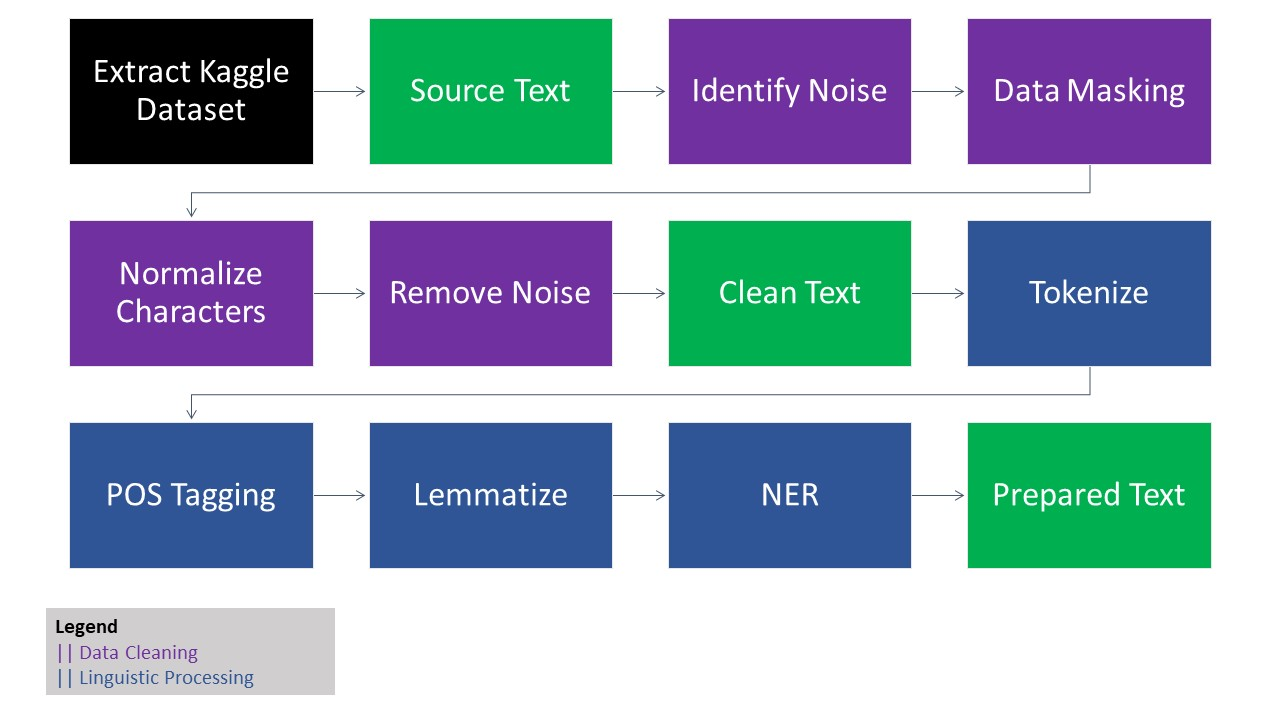

#### Phase 2: Feature Engineering and Training
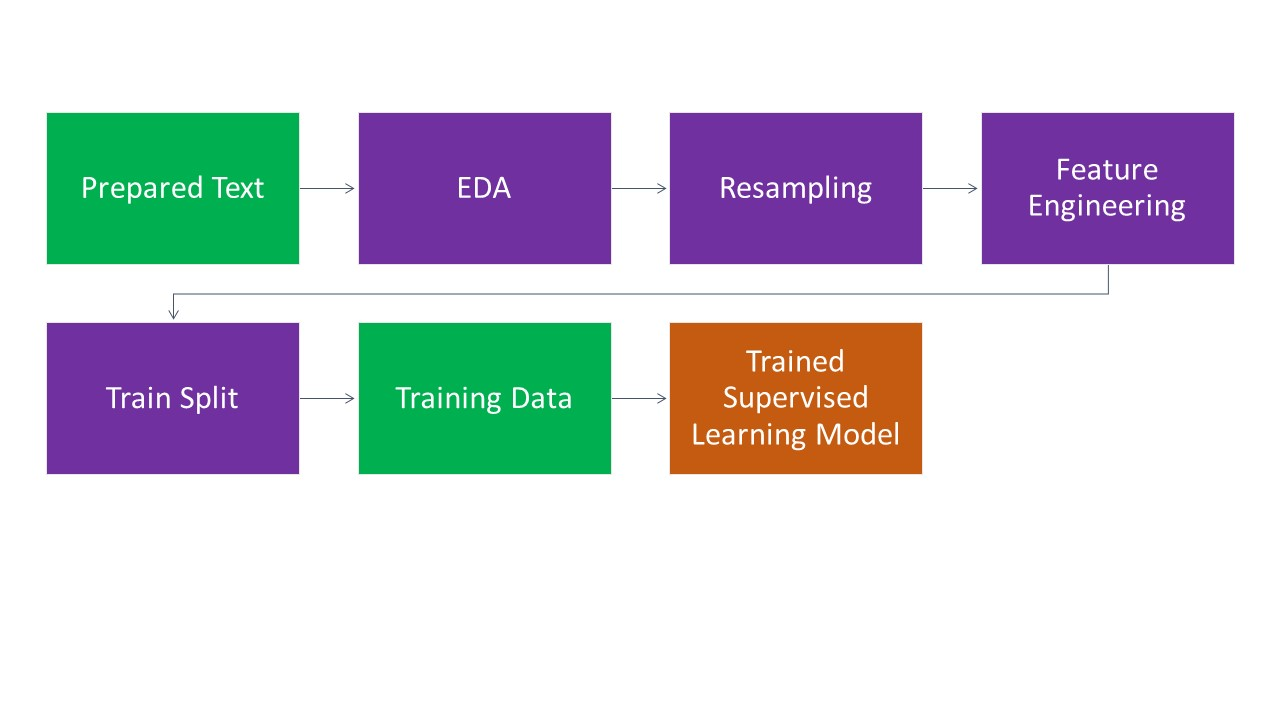

### 3. Data Ingestion
We begin by using the kaggle api to download our amazon reviews dataset to our current directory.
We can accomplish this by leaving the download path argument blank when we send our API request.

In [2]:
import kaggle
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import os
kaggle.api.authenticate()

In [3]:
kaggle.api.dataset_download_files(
    'PromptCloudHQ/amazon-reviews-unlocked-mobile-phones', 
    unzip=True
)

In [4]:
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df = df.rename(columns={"Reviews": "text"})
df.head()

,Product Name,Brand Name,Price,Rating,text,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


Next, we can do a cursory overview of several data points:
<ul>
    <li>What our distribution of ratings is</li>
    <li>What our distribution of prices is</li>
    <li>What our distribution of review length is</li>
</ul>

#### 3a. Rating Distribution and Price Distribution

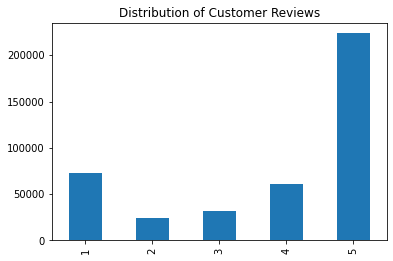

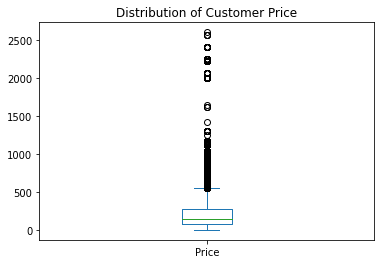

In [20]:
df['Rating'].value_counts().sort_index().plot(kind='bar',title="Distribution of Customer Reviews")
plt.show()
df['Price'].plot(kind='box',title="Distribution of Customer Price")
plt.show()

#### 3b. Review Length Distribution
Our findings show that while the majority of reviews are at around 100 characters, some reviews are fairly extensive. We may consider setting an upper bound on the number of characters we're willing to accept to avoid higher dimensionality.

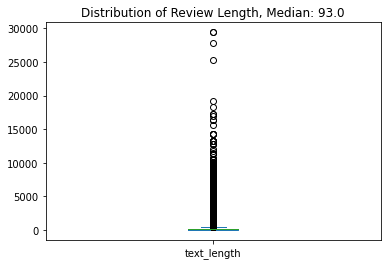

In [32]:
#create the length feature
df['text'] = df['text'].astype(str)
df['text_length'] = df['text'].map(len)
#get the median character length
median_len = str(np.median(df['text_length']))
sdev = np.std(df['text_length'])
df['text_length'].plot(kind='box',title=f'Distribution of Review Length, Median: {median_len}')
plt.show()

In [42]:
#how many outliers do we have?
mean_len= np.mean(df['text_length'])
within_two_sd = df[abs(df['text_length'] - mean_len) <= 2*sdev]
print(len(within_two_sd)/len(df))

0.9712666731103808


about 3% of our dataset has a text length two standard deviations or more from the mean. Let's examine what our boxplot looks like if we were to remove these. We may also want to consider the fact that we have not cleaned our data yet, so much of this EDA is to be taken with a grain of salt.

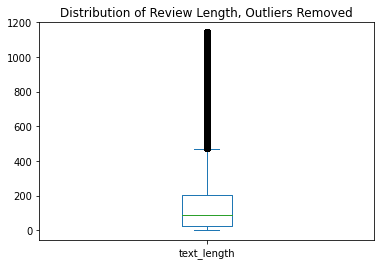

In [45]:
within_two_sd['text_length'].plot(kind='box',title=f'Distribution of Review Length, Outliers Removed')
plt.show()
del within_two_sd #clear kernel space

#### 3c. Do Price and Review Length share a connection?

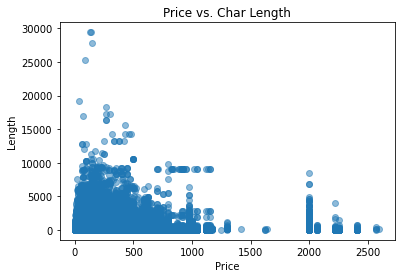

In [27]:
plt.scatter(df['Price'], df['text_length'], alpha=0.5)
plt.title("Price vs. Char Length")
plt.xlabel("Price")
plt.ylabel("Length")
plt.show()